In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

#忽略警告
import warnings
warnings.filterwarnings('ignore')
#读取数据
df_credit = pd.read_csv('creditcard.csv')
df_credit.head()
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
import sys
!pip3 install seaborn --user

     |████████████████████████████████| 296kB 1.4MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


统计分布：正常（0）vs 盗刷（1）：
0    284315
1       492
Name: Class, dtype: int64


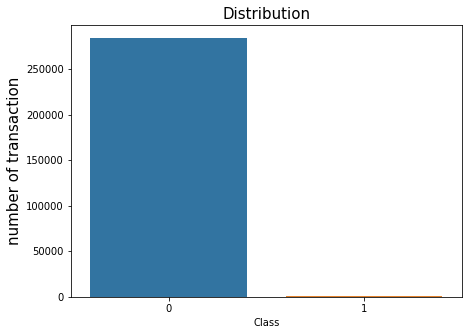

盗刷金额统计


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
#我们首先看一下正常交易和盗刷之间的比例
print('统计分布：正常（0）vs 盗刷（1）：')
print(df_credit['Class'].value_counts())

#绘制分布图更直观
plt.figure(figsize=(7,5))
sns.countplot(df_credit['Class'])
plt.title('Distribution',fontsize=15)
plt.ylabel('number of transaction', fontsize=15)
plt.show()

df_fraud = df_credit[df_credit['Class'] == 1]
df_normal = df_credit[df_credit['Class'] == 0]
print('盗刷金额统计')
df_fraud['Amount'].describe()


In [18]:
print('正常交易金额统计')
df_normal['Amount'].describe()

正常交易金额统计


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

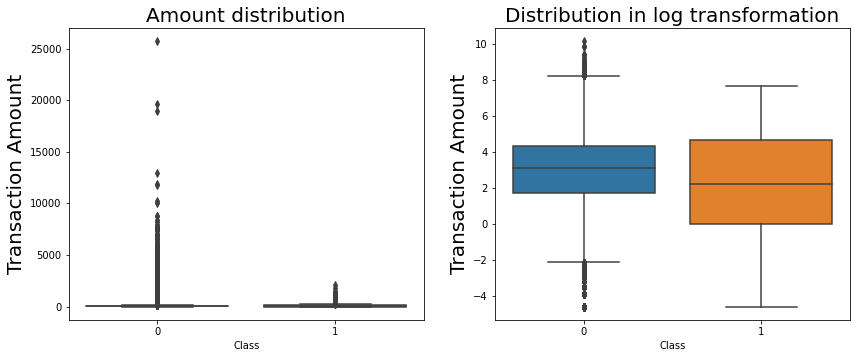

In [19]:
plt.figure(figsize=(14,6))
plt.subplot(121)
ax = sns.boxplot(x='Class',y='Amount',data=df_credit)
ax.set_title('Amount distribution',fontsize=20)
#ax.set_xlabel('Fake transaction(Yes:1,No:0)',fontsize=20)
ax.set_ylabel('Transaction Amount',fontsize=20)

#用log的数据变化方法使得分布变得显著
df_credit['Amount_log'] = np.log(df_credit['Amount'] + 0.01)
plt.subplot(122)
ax1 = sns.boxplot(x='Class',y='Amount_log',data=df_credit)
ax1.set_title('Distribution in log transformation',fontsize=20)
#ax1.set_xlabel('Fake transaction(Yes:1,No:0)',fontsize=20)
ax1.set_ylabel('Transaction Amount',fontsize=20)

plt.subplots_adjust(hspace=0.6,top=0.8)
plt.show()

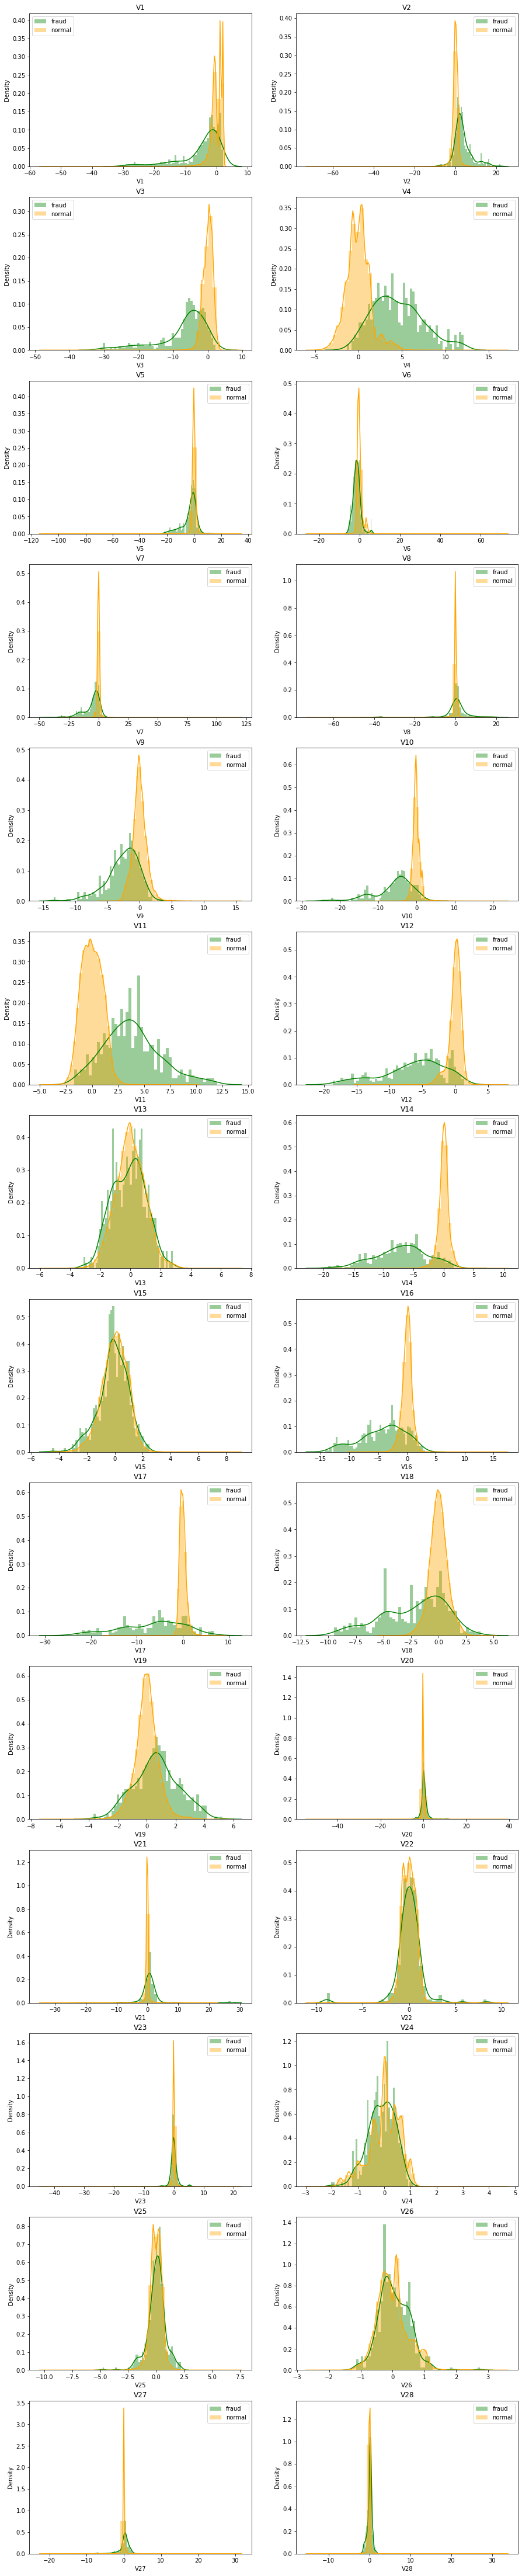

In [21]:
columns = df_credit.iloc[:,1:29].columns #选取V1到V28特征
frauds = df_credit.Class == 1            #判断条件：Class为1，则为盗刷
normals = df_credit.Class == 0           #判断条件：Class为0，则为正常

plt.figure(figsize=(15,20*4))            #设置画板大小
grid = gridspec.GridSpec(14,2)           #将画纸设置为14行，2列

#利用for循环，绘制V1至V28特征的核密度函数图
for n,col in enumerate(df_credit[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df_credit[col][frauds],bins=50,color='g',label="fraud")
    sns.distplot(df_credit[col][normals],bins=50,color='orange',label="normal")
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    plt.legend()
plt.show()

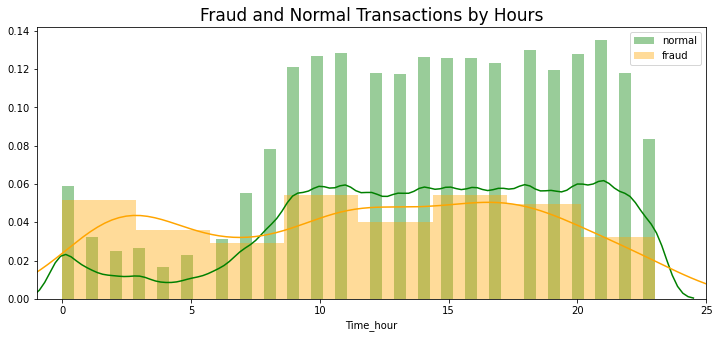

In [35]:
#从交易时间对数据进行探索
timedelta = pd.to_timedelta(df_credit['Time'],unit ='s')
df_credit['Time_min'] = (timedelta.dt.components.minutes).astype(int)
df_credit['Time_hour'] = (timedelta.dt.components.hours).astype(int)

#从小时上来看，能否找到有用的观点
plt.figure(figsize=(12,5))
sns.distplot(df_credit[df_credit['Class'] == 0]['Time_hour'],color='g',label="normal")
sns.distplot(df_credit[df_credit['Class'] == 1]['Time_hour'],color='orange',label="fraud")
plt.title('Fraud and Normal Transactions by Hours',fontsize=17)
plt.xlim([-1,25])
plt.legend()
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler
import imblearn

#使用SMOTE包解决样本不平衡的问题
from imblearn.over_sampling import SMOTE                              

#导入训练测试数据拆分
from sklearn.model_selection import train_test_split
from collections import Counter

#引入指标检验计算结果
from sklearn.metrics import classification_report                    
from sklearn.metrics import accuracy_score,precision_score,recall_score,fbeta_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,roc_auc_score

#导入算法模型
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#网格搜索法调参
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import GridSearchCV

#选取数据，并对进行标准化处理
transfer = StandardScaler()                                #实例化转化器
col = ['Time','Amount']
df_credit[col] = transfer.fit_transform(df_credit[col])
df_credit = df_credit.iloc[:,0:-3]
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [24]:
x = df_credit.drop(['Class'],axis=1).values
y = df_credit['Class'].values
#建立smote模型
sm = SMOTE(random_state=4)

#对原特征和标签记性采样
x_oversample,y_oversample = sm.fit_sample(x,y)

#查看过采样前后的数据变化
print('normal data distribution:{}'.format(Counter(y)))
print('SMOTE data distribution:{}'.format(Counter(y_oversample)))
#normal data distribution:Counter({0: 284315, 1: 492})
#SMOTE data distribution:Counter({0: 284315, 1: 284315})

KeyError: "['Class'] not found in axis"

In [13]:
import sys
!conda install --yes --prefix {sys.prefix} imblearn

zsh:1: command not found: conda


In [33]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

#classification libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

#dimension reduction packages 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve


#animation and dynamic visualization 
import plotly
import plotly.graph_objects as go
import plotly.express as px              #the ploty function enable us to realize some interacting function in the visualization 
from plotly.offline import iplot,init_notebook_mode
import cufflinks as cf                   #the visualizzation tool 
from scipy import stats                  #the package can be used to apply some basic regression method into application

#Deep learning part
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torch import nn,optim
from torch.nn import functional as F 
from torch.utils.data import Dataset,DataLoader,TensorDataset
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
#plotly.offline.iplot()
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=True, world_readable=True)

In [48]:
data = pd.read_csv('creditcard.csv')
display(data.info())
display(data.describe())



data.dropna(axis = 0)[data["Class"]==1].describe()
data = data.dropna(axis = 0)
data = data.drop_duplicates()

Fraud = data[data["Class"] == 1]
Normal = data[data["Class"] == 0]
print(Fraud.shape)
print(Normal.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

None

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


(473, 31)
(283253, 31)


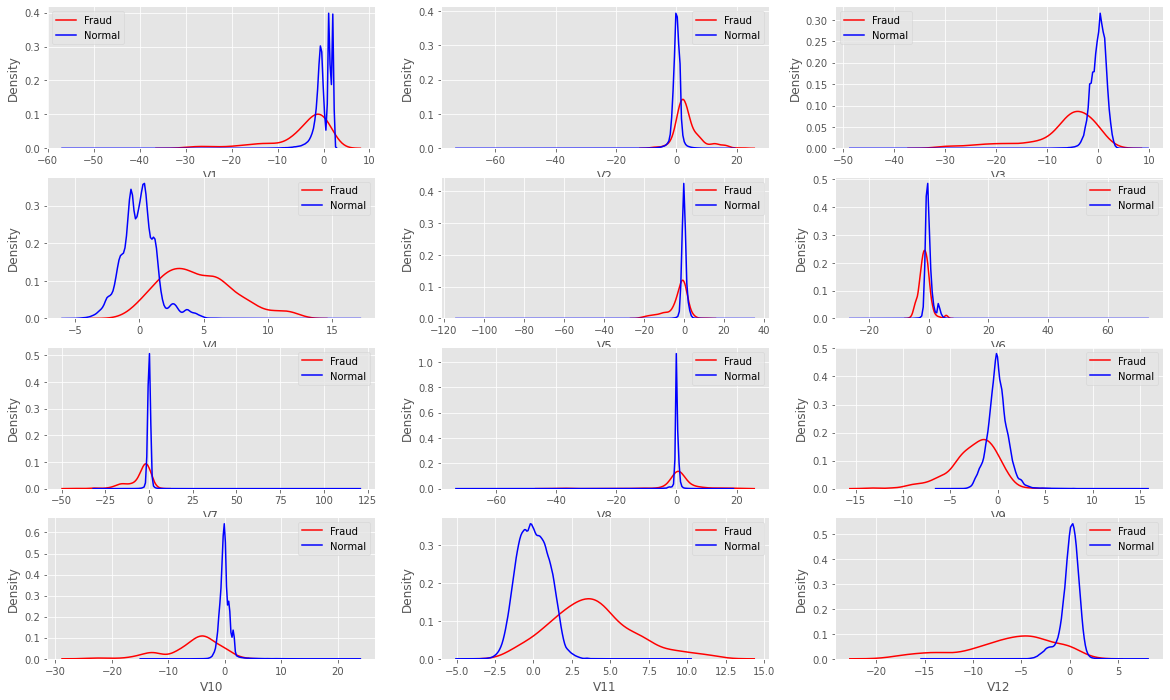

In [45]:
plt.figure(figsize = (20,12))
j=1;
for i in range(1,13):
    plt.subplot(4,3,j)
    
    sns.distplot(Fraud["V"+str(i)],hist = False,color = 'red',label = "Fraud")
    sns.distplot(Normal["V"+str(i)],hist = False, color = 'blue',label = "Normal")
    plt.legend(fontsize = "medium",loc = "best")
    j = j+1   

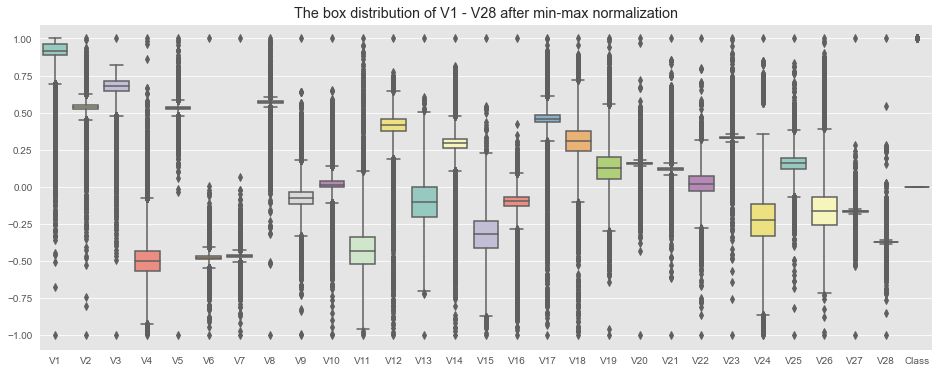

In [122]:
import copy 
#data = data.drop(["Amount","Time"],axis = 1)
df = copy.deepcopy(data)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (-1,1))
for i in range(1,29):
    df["V"+str(i)] = scaler.fit_transform(df["V"+str(i)].values.reshape(-1,1))

f, ax = plt.subplots(figsize=(16,6))
plt.style.use('ggplot') # Using ggplot2 style visuals 
#ax.set_facecolor('#fafafa')
ax = sns.boxplot(data = df, palette = 'Set3',whis = 2.5)
plt.title("The box distribution of V1 - V28 after min-max normalization")
plt.show()

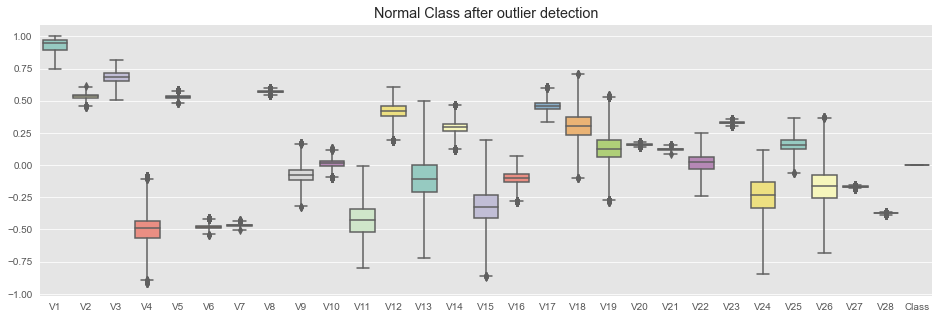

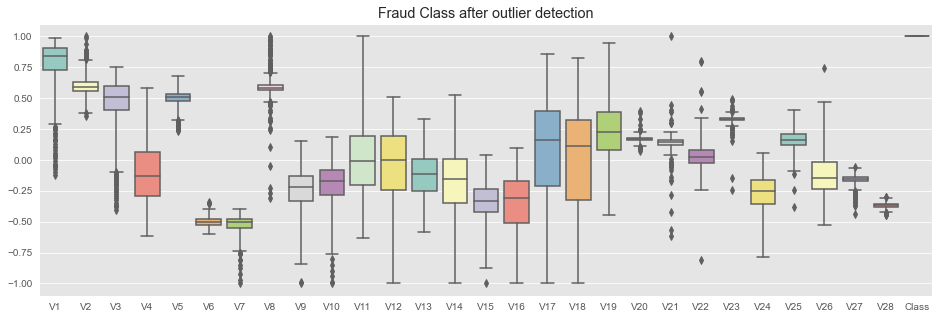

(473, 29)
(212538, 29)


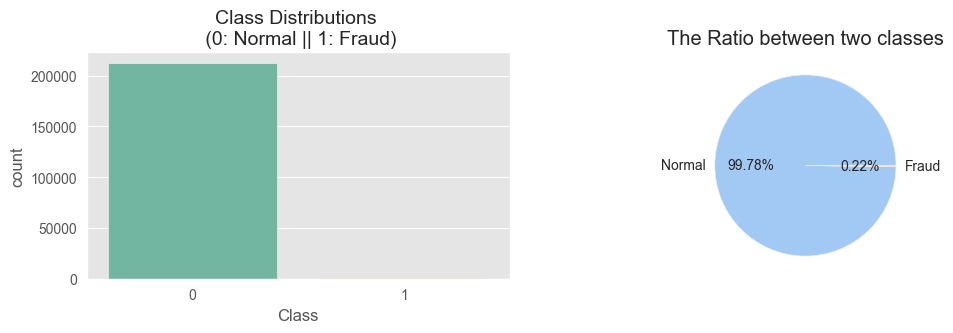

In [123]:
import copy
collist = ["V"+ str(i) for i in range(1,29)]
df2 = df
df2fraud = df2[df2["Class"] == 1]
df2normal = df2[df2["Class"] == 0]
for column in collist:
    Q1 = np.percentile(df2normal[column],25)    # calculate the 25 percentile and 75 percentile 
    Q3 = np.percentile(df2normal[column],75)
    IQR = Q3-Q1                          # calculate the interval 
    threshold = IQR * 2.5                # set the threshold of 2.5 times of IQR
    lower, upper = Q1 - threshold, Q3 + threshold                  
    df2normal= df2normal[(df2normal[column]>lower) & (df2normal[column]<upper)]
df2 = pd.concat([df2normal,df2fraud])

from sklearn.utils import shuffle
df2 = shuffle(df2)    

df3 = data
df3fraud = df3[df3["Class"] == 1]
df3normal = df3[df3["Class"] == 0]
for column in collist:
    Q1 = np.percentile(df3normal[column],25)    # calculate the 25 percentile and 75 percentile 
    Q3 = np.percentile(df3normal[column],75)
    IQR = Q3-Q1                          # calculate the interval 
    threshold = IQR * 2.5                # set the threshold of 2.5 times of IQR
    lower, upper = Q1 - threshold, Q3 + threshold                  
    df3normal= df3normal[(df3normal[column]>lower) & (df3normal[column]<upper)]
df3 = pd.concat([df3normal,df3fraud])

from sklearn.utils import shuffle
df3 = shuffle(df3) 

#plt.figure(figsize = (16,4))

#plt.subplot(1,2,1)
f, ax = plt.subplots(figsize=(16,5))
plt.style.use('ggplot') # Using ggplot2 style visuals 
#ax.set_facecolor('#fafafa')
ax = sns.boxplot(data = df2normal, palette = 'Set3',whis = 2.5)
plt.title("Normal Class after outlier detection")
plt.show()

#plt.subplot(1,2,2)
f, ax = plt.subplots(figsize=(16,5))
plt.style.use('ggplot') # Using ggplot2 style visuals 
#ax.set_facecolor('#fafafa')
ax = sns.boxplot(data = df2fraud, palette = 'Set3',whis = 2.5)
plt.title("Fraud Class after outlier detection")
plt.show()

Fraud = df3[df3["Class"] == 1]
Normal = df3[df3["Class"] == 0]
print(Fraud.shape)
print(Normal.shape)

plt.figure(figsize = (12,3),dpi = 100)

plt.subplot(1,2,1)
sns.countplot('Class',data = df3, palette = "Set2")
plt.title('Class Distributions \n (0: Normal || 1: Fraud)', fontsize=14)

plt.subplot(1,2,2)
countdata = [df3[df3["Class"] == 0]["Class"].count(),df3[df3["Class"] == 1]["Class"].count()]
labelsdata = ["Normal","Fraud"]
colors = sns.color_palette('pastel')[0:2]
plt.pie(countdata, labels = labelsdata, colors = colors,autopct='%.2f%%')
plt.title("The Ratio between two classes")
plt.show()



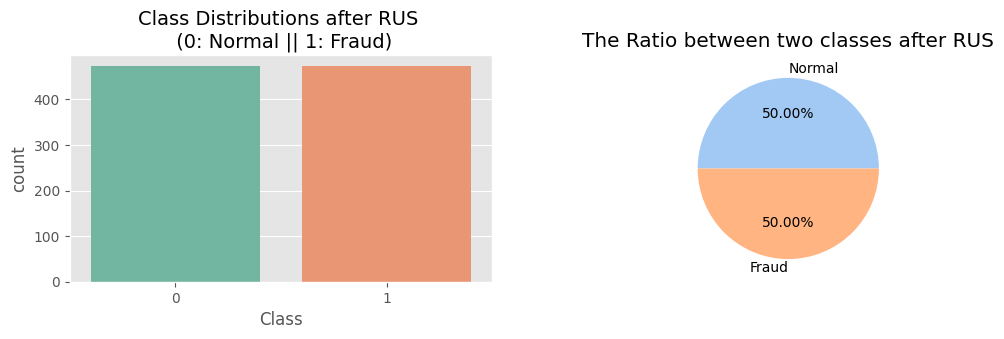

In [55]:
Normal = df3[df3["Class"] == 0]
Fraud = df3[df3["Class"] == 1]

RUSNormal = Normal.iloc[:df3[df3["Class"] == 1]["Class"].count()]
RUSFraud = Fraud
RUSdata = pd.concat([RUSNormal,RUSFraud])
RUSdata = shuffle(RUSdata)
scaler = MinMaxScaler(feature_range = (-1,1))
for i in range(1,29):
    RUSdata["V"+str(i)] = scaler.fit_transform(RUSdata["V"+str(i)].values.reshape(-1,1))
RUSdata.head()

plt.figure(figsize = (12,3),dpi = 100)

plt.subplot(1,2,1)
sns.countplot('Class',data = RUSdata, palette = "Set2")
plt.title('Class Distributions after RUS \n (0: Normal || 1: Fraud)', fontsize=14)

plt.subplot(1,2,2)
countdata = [RUSdata[RUSdata["Class"] == 0]["Class"].count(),RUSdata[RUSdata["Class"] == 1]["Class"].count()]
labelsdata = ["Normal","Fraud"]
colors = sns.color_palette('pastel')[0:2]
plt.pie(countdata, labels = labelsdata, colors = colors,autopct='%.2f%%')
plt.title("The Ratio between two classes after RUS")
plt.show()

# choose a few columns to see the distribution
Copydata = RUSdata[collist]
layout = go.Layout(
    autosize=False,
    width=800,
    height=750,
    xaxis= go.layout.XAxis(linewidth = 1),
    yaxis= go.layout.YAxis(linewidth = 1),
#margin=go.layout.Margin(l=50, r=50,b=100,t=100,pad = 4)
)
Copydata.iplot(kind='hist',              # choose the kind of histogram     
           subplots=True,               # plot a few subplots 
           shape = (7,4),
           horizontal_spacing=.03,       # set the horizontal space 
           fill=True,
           layout = layout,
           shared_yaxes = True,
           subplot_titles=True,        # set the subtitle 
           title='Data Distribution')
# using the Cufflinks package to plot a dynamic chart to visualize the distribution of some variables

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


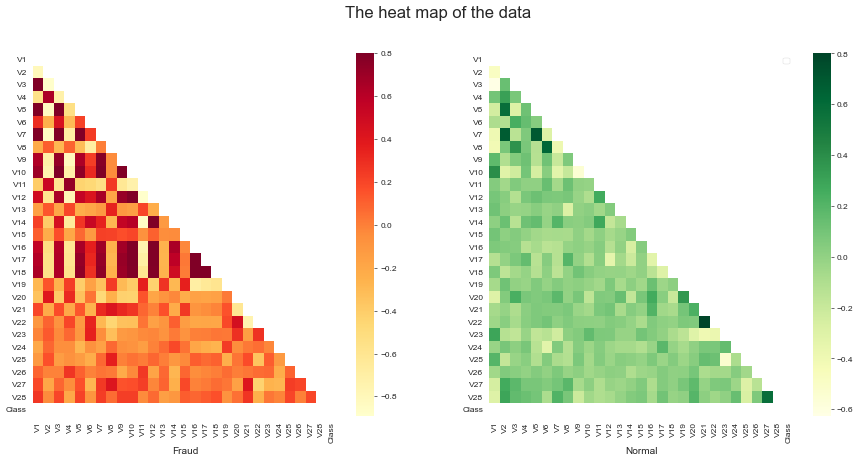

In [91]:
plt.figure(figsize = (18,8),dpi = 60)   # set the canvas 
corr = RUSdata.corr()                   # instantiate the correlation matrix
mask =  np.zeros_like(corr, dtype = np.bool)          # set the mask of the heap map 
mask[np.triu_indices_from(mask)] = True 
sns.set_style("whitegrid")                            # set the seaborn style 
plt.title("The heat map of the data")
plt.subplot(1,2,1)
sns.heatmap((RUSdata.loc[RUSdata['Class'] ==1]).corr(), vmax = .8, cmap = "YlOrRd" , mask=mask);# the fraud part 
plt.xlabel("Fraud")
plt.subplot(1,2,2)
sns.heatmap((RUSdata.loc[RUSdata['Class'] ==0]).corr(), vmax = .8,  cmap = "YlGn", mask=mask);    # the noraml part 
plt.suptitle("The heat map of the data",fontsize = 20)
plt.xlabel("Normal")
plt.legend()
plt.show()

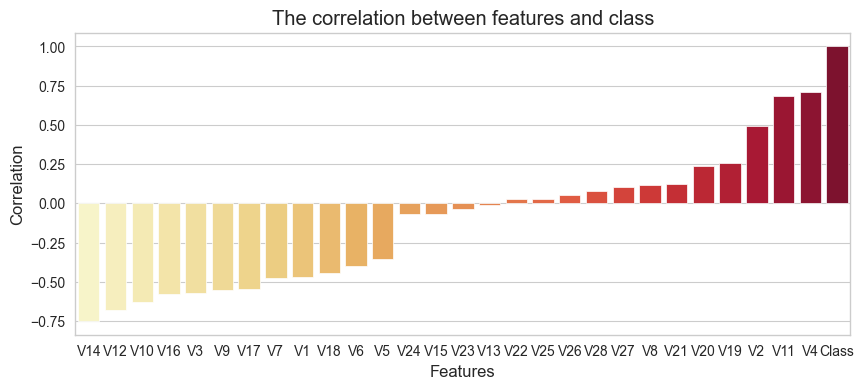

In [119]:


plt.figure(figsize = (10,4),dpi = 100)
c = pd.DataFrame(RUSdata.corr().sort_values('Class',ascending=True)['Class'])
sns.barplot(x = c.index, y = c.values.flatten(), palette = "YlOrRd")
plt.title("The correlation between features and class")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.show()




In [60]:
def NormalMean(a):
    feature = 'V'+str(a)
    return RUSdata[RUSdata["Class"] == 0].loc[:,feature].mean()
def FraudMean(a):
    feature = 'V'+str(a)
    return RUSdata[RUSdata["Class"] == 1].loc[:,feature].mean()
def NormalStd(a):
    feature = 'V'+str(a)
    return RUSdata[RUSdata["Class"] == 0].loc[:,feature].std()
def FraudStd(a):
    feature = 'V'+str(a)
    return RUSdata[RUSdata["Class"] == 1].loc[:,feature].std()

import plotly.graph_objects as go
import plotly.figure_factory as ff
table_data = [['Features', 'Normal Mean', 'Fraud Mean','Normal Std','Fraud Std'],
              ['V10', NormalMean(10), FraudMean(10),NormalStd(10),FraudStd(10)],
              ['V11', NormalMean(11), FraudMean(11),NormalStd(11),FraudStd(11)],
              ['V16', NormalMean(16), FraudMean(16),NormalStd(16),FraudStd(16)],
              ['V17', NormalMean(17), FraudMean(17),NormalStd(17),FraudStd(17)],
              ['V20', NormalMean(20), FraudMean(20),NormalStd(20),FraudStd(20)],
              ['V23', NormalMean(23), FraudMean(23),NormalStd(23),FraudStd(23)],
              ['V28', NormalMean(28), FraudMean(28),NormalStd(28),FraudStd(28)]]
fig = ff.create_table(table_data, height_constant=20)
teams = ["V10","V11","V16","V17","V20","V23","V28"]

# create four different bars 
nm = [NormalMean(10),NormalMean(11),NormalMean(16),NormalMean(17),NormalMean(20),NormalMean(23),NormalMean(28)]
fm = [FraudMean(10),FraudMean(11),FraudMean(16),FraudMean(17),FraudMean(20),FraudMean(23),FraudMean(28)]
ns = [NormalStd(10),NormalStd(11),NormalStd(16),NormalStd(17),NormalStd(20),NormalStd(23),NormalStd(28)]
fs = [FraudStd(10),FraudStd(11),FraudStd(16),FraudStd(17),FraudStd(20),FraudStd(23), FraudStd(28)]

# Make traces for graph
trace1 = go.Bar(x=teams, y=nm, xaxis='x2', yaxis='y2',
                marker=dict(color='#0099ff'),
                name='NormalMean')
trace2 = go.Bar(x=teams, y=fm, xaxis='x2', yaxis='y2',
                marker=dict(color='#404040'),
                name='FraudMean')
trace3 = go.Bar(x=teams, y=ns, xaxis='x2', yaxis='y2',
                marker=dict(color='red'),
                name='NormalStd')
trace4 = go.Bar(x=teams, y=fs, xaxis='x2', yaxis='y2',
                marker=dict(color='green'),
                name='FraudStd')

# Add trace data to figure
fig.add_traces([trace1, trace2,trace3,trace4])

# initialize xaxis2 and yaxis2
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}

# Edit layout for subplots
fig.layout.yaxis.update({'domain': [0, .55]})
fig.layout.yaxis2.update({'domain': [.6, 1]})

# The graph's yaxis2 MUST BE anchored to the graph's xaxis2 and vice versa
fig.layout.yaxis2.update({'anchor': 'x2'})
fig.layout.xaxis2.update({'anchor': 'y2'})
fig.layout.yaxis2.update({'title': 'Comparisons'})

# Update the margins to add a title and see graph x-labels.
fig.layout.margin.update({'t':50, 'l':50})
fig.layout.update({'title': 'The Comparison of statistical values'})

# Update the height because adding a graph vertically will interact with the plot height calculated for the table
fig.layout.update({'height':400})
fig.show()

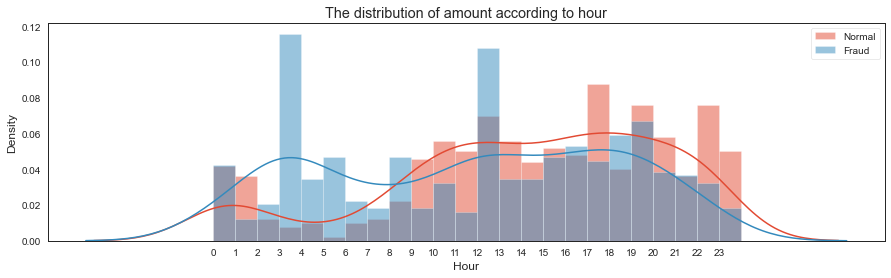

In [63]:
DATA = pd.read_csv('creditcard.csv')
DATA['hour'] = DATA['Time'].apply(lambda x: np.ceil(float(x)/3600) % 24)
timedata = pd.concat([shuffle(DATA[DATA["Class"] == 0 ]).iloc[:500],  DATA[DATA["Class"] == 1]])
timedata.head()

sns.set_style("white")
bins = np.arange(timedata['hour'].min(),timedata['hour'].max()+2)
plt.figure(figsize=(15,4))
# plot a distribution plot according to the hour
sns.distplot(timedata[timedata['Class']==0.0]['hour'],bins=bins,kde=True,hist_kws={'alpha':.5}, label='Normal')
sns.distplot(timedata[timedata['Class']==1.0]['hour'],bins=bins,kde=True,label='Fraud',hist_kws={'alpha':.5})

plt.xticks(range(0,24))
plt.legend()
plt.title("The distribution of amount according to hour")
plt.xlabel("Hour")
plt.ylabel("Density")
plt.show()

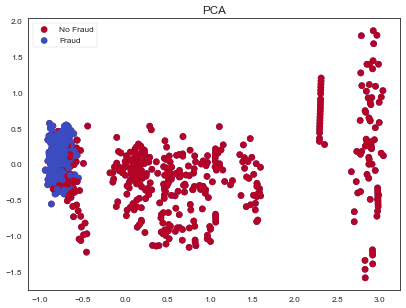

In [64]:
from sklearn.decomposition import PCA
features = ["V"+ str(i) for i in range(1,29)]   # create of list of V1-V28
tstart = time.time()
Xpca = PCA(2).fit_transform(RUSdata[features].values)  # instanciate the pca 
Ypca = RUSdata["Class"]
tend = time.time()
PCAtime = tend - tstart   # record the running time of PCA 

# draw a scatter plot of the PCA method
plt.figure(figsize = (8,6),dpi = 60)
plt.scatter(Xpca[:,0], Xpca[:,1], c = (Ypca==0),cmap='coolwarm', label='No Fraud', linewidths=2)
plt.scatter(Xpca[:,0], Xpca[:,1], c = (Ypca==1),cmap='coolwarm', label='Fraud', linewidths=2)
plt.legend()
plt.title('PCA', fontsize=14)
plt.show()



In [101]:
import plotly.express as px
from sklearn.decomposition import PCA
# utilize the plotly package to create the dynamic canvas 
pca = PCA(4)  
RUSdata = shuffle(RUSdata)
hhh = copy.deepcopy(RUSdata)

components = pca.fit_transform(RUSdata[features])
labels = {
    #str(i): f"PC {i+1} ({var:.0f}%)"
    str(i): f"PC {i+1})"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=(hhh["Class"]).astype(bool),
    color_discrete_sequence = ["blue","orange"],
)
fig.update_traces(diagonal_visible=False)
fig.update_layout(title_x = 0.5)
fig.show()

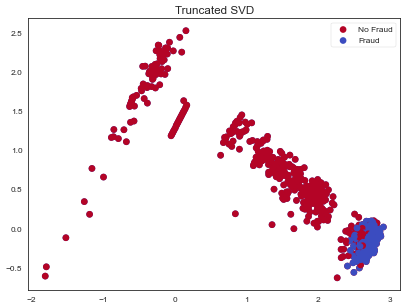

In [66]:
from sklearn.decomposition import TruncatedSVD
tstart = time.time()
# instanciate the svd 
Xsvd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(RUSdata[features].values)
Ysvd = RUSdata["Class"]
tend = time.time()
SVDtime = tend - tstart   # record the running time of SVD 

# draw a scatter plot of the SVD 
plt.figure(figsize = (8,6),dpi = 60)
plt.scatter(Xsvd[:,0], Xsvd[:,1], c = (Ysvd==0),cmap='coolwarm', label='No Fraud', linewidths=2)
plt.scatter(Xsvd[:,0], Xsvd[:,1], c = (Ysvd==1),cmap='coolwarm', label='Fraud', linewidths=2)
plt.legend()
plt.title('Truncated SVD', fontsize=14)
plt.show()

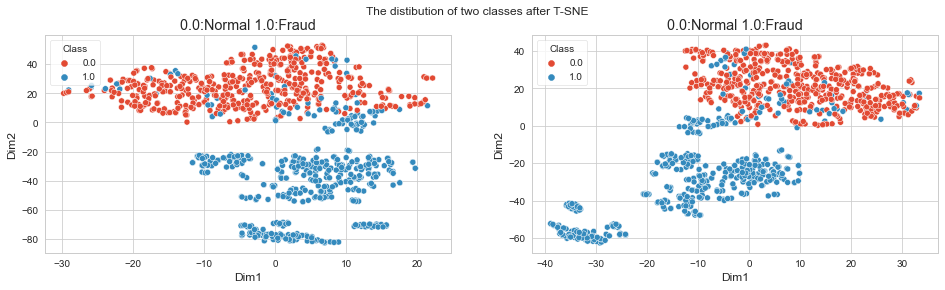

In [67]:
from sklearn.manifold import TSNE # import the manifold learning package from the Sklearn 
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2,figsize = (16,4))
tstart = time.time()
tsne = TSNE(n_components=2) 
X_tsne = tsne.fit_transform(RUSdata[features]) 
y = RUSdata["Class"].values
tend = time.time()
TSNEtime = tend - tstart
X_tsne_data = np.vstack((X_tsne.T, y)).T 
df_tsne = pd.DataFrame(X_tsne_data, columns=['Dim1', 'Dim2','Class']) 
sns.scatterplot(data=df_tsne, hue='Class', x='Dim1', y='Dim2',ax = axes[0]) 
#plt.scatter(df_tsne["Dim1"],df_tsne["Dim2"],c = df_tsne["Class"])
axes[0].set_title("0.0:Normal 1.0:Fraud")


tsne = TSNE(n_components=2) 
X_tsne = tsne.fit_transform(RUSdata[features]) 
y = RUSdata["Class"].values
X_tsne_data = np.vstack((X_tsne.T, y)).T 
df_tsne = pd.DataFrame(X_tsne_data, columns=['Dim1', 'Dim2','Class']) 
sns.scatterplot(data=df_tsne, hue='Class', x='Dim1', y='Dim2',ax = axes[1]) 
#plt.scatter(df_tsne["Dim1"],df_tsne["Dim2"],c = df_tsne["Class"])
axes[1].set_title("0.0:Normal 1.0:Fraud")

plt.suptitle("The distibution of two classes after T-SNE")
plt.show()

In [68]:
tsne = TSNE(n_components=3)   # instanciate the TSNE dimenesion reduction method
X_tsne = tsne.fit_transform(RUSdata[features])      
y = RUSdata["Class"].values   # transform the dataframe sturcture into the numpy array 
X_tsne_data = np.vstack((X_tsne.T, y)).T  
df_tsne = pd.DataFrame(X_tsne_data, columns=['Dim1', 'Dim2','Dim3','Class']) 
df_tsne["Class"] = df_tsne["Class"].astype(bool)
import plotly.express as px
fig = px.scatter_3d(df_tsne, x='Dim1', y='Dim2', z='Dim3',color='Class',color_discrete_sequence = ["yellow","blue"], 
                    title = "The visualization of T-SNE methods in 3D dynamic plot")
fig.update_layout(width = 500, height = 500)
fig.show()


In [69]:
print("PCA method used a total of {:.2}s".format(PCAtime))
print("SVD method used a total of {:.2}s".format(SVDtime))
print("T-SNE method used a total of {:.2}s".format(TSNEtime))

PCA method used a total of 0.0077s
SVD method used a total of 0.012s
T-SNE method used a total of 3.3s


In [70]:
normal2 = shuffle(df3[df3["Class"] == 0]).iloc[:427,]
fraud2 = shuffle(df3[df3["Class"] == 1])
RUSdata2 = pd.concat([normal2, fraud2])
RUSdata2 = shuffle(RUSdata2)
RUSdata2.head()





test = copy.deepcopy(RUSdata)
test.head()

# Set the train and test data
X = RUSdata2.drop("Class",axis = 1)
Y = RUSdata2["Class"]
XTEST = test.drop("Class",axis = 1)
YTEST = test["Class"]

X_train = X.values           # get the numpy array from the dataframe 
Y_train = Y.values         
X_test = XTEST.values 
Y_test = YTEST.values






from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
lr = LogisticRegression()         # instanciate a logistic regression model named lr
lr.fit(X_train,Y_train)           # fit the model 
pred = lr.predict(X_test) 





from sklearn.metrics import classification_report
print(classification_report(Y_test,pred)) 

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       473
           1       0.00      0.00      0.00       473

    accuracy                           0.50       946
   macro avg       0.25      0.50      0.33       946
weighted avg       0.25      0.50      0.33       946



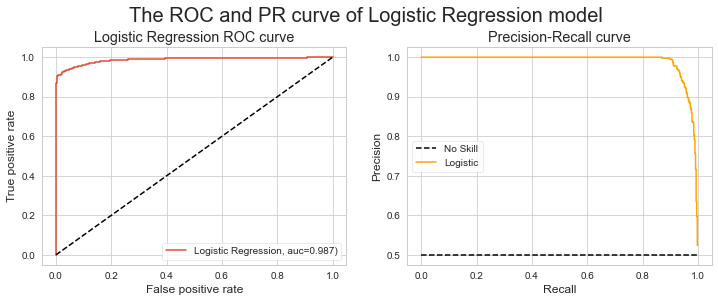

In [71]:
y_pred_logit_proba = lr.predict_proba(X_test)[::,1]
fpr_logit, tpr_logit, _ = metrics.roc_curve(Y_test,  y_pred_logit_proba)
auc_logit = metrics.roc_auc_score(Y_test, y_pred_logit_proba)
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(fpr_logit,tpr_logit,label="Logistic Regression, auc={:.3f})".format(auc_logit))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.legend()

plt.subplot(1,2,2)
logit_precision, logit_recall, _ = precision_recall_curve(Y_test, y_pred_logit_proba)
no_skill = len(Y_test[Y_test==1]) / len(Y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(logit_recall, logit_precision, color='orange', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.suptitle("The ROC and PR curve of Logistic Regression model",fontsize = 20,y = 1.02)
plt.show()

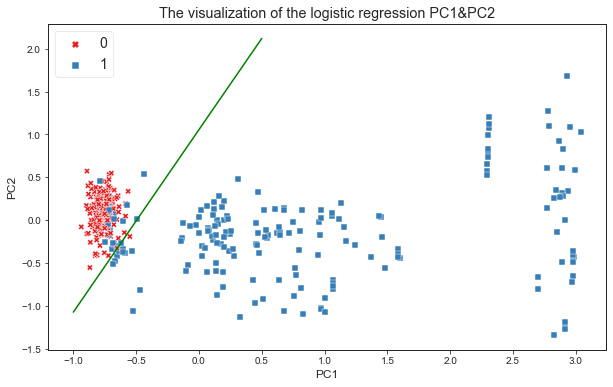

In [72]:
visualdata = pd.DataFrame(Xpca.copy())
visualdata["Class"] = Ypca.values 
visualdata.columns = ["PC1","PC2","Class"]
visualdata.head()




lr2 = LogisticRegression()
visualx = visualdata.drop("Class",axis = 1)
visualy = visualdata["Class"]
lr2.fit(visualx, visualy)
y_hat = lr2.predict(visualx)




def x2(x1):
    return (-lr2.coef_[0][0] * x1 - lr2.intercept_[0]) / lr2.coef_[0][1]

plt.figure(figsize = (10,6))
sns.set_style('ticks')
x = np.linspace(-1,0.5,50)
y = x2(x)
visualdata = visualdata.iloc[:400,]
markers = {1: "s", 0: "X"}
sns.scatterplot(x="PC1",y = "PC2",hue = "Class",style = "Class",markers = markers,data = visualdata, palette = "Set1")
sns.lineplot(x = x,y = y,color ='g')
plt.title("The visualization of the logistic regression PC1&PC2")
plt.legend(fontsize = 14)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The prediction accuracy of the Linear Regression model after cross validation is 95.33%
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       473
           1       1.00      0.02      0.04       473

    accuracy                           0.51       946
   macro avg       0.75      0.51      0.35       946
weighted avg       0.75      0.51      0.35       946



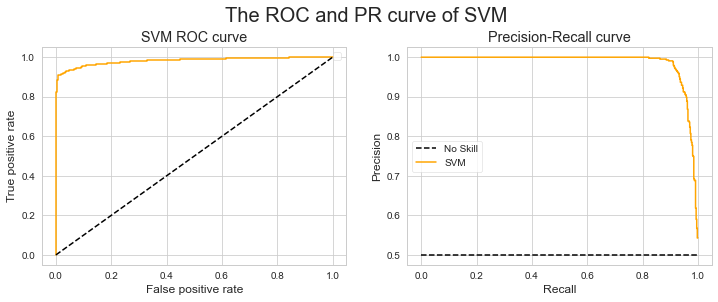

In [104]:
from sklearn.model_selection import cross_val_score
#import the package from the sklearn to evaluate the corss validation score
training_score = cross_val_score(lr,X_train,Y_train, cv=5)
print("The prediction accuracy of the Linear Regression model after cross validation is {:.2f}%".format(100*training_score.mean()))



from sklearn import svm
classifier = svm.SVC(kernel='linear',probability= True)          #instantiate the SVM classifier 
classifier.fit(X_train,Y_train)                #fit the model 
pred = classifier.predict(X_test)                



from sklearn.metrics import classification_report
print(classification_report(Y_test,pred))    # get a brief report of the prediction performance 



y_pred_svm_proba = classifier.predict_proba(X_test)[::,1]
fpr_svm, tpr_svm, _ = metrics.roc_curve(Y_test,  y_pred_svm_proba)
auc_svm = metrics.roc_auc_score(Y_test, y_pred_svm_proba)
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(fpr_svm,tpr_svm,color="orange")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVM ROC curve')
plt.legend()

plt.subplot(1,2,2)
svm_precision, svm_recall, _ = precision_recall_curve(Y_test, y_pred_svm_proba)
no_skill = len(Y_test[Y_test==1]) / len(Y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(svm_recall, svm_precision, color='orange', label='SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.suptitle("The ROC and PR curve of SVM",fontsize = 20,y = 1.02)
plt.show()


The prediction accuracy of the SVM model after cross validation is 95.00%


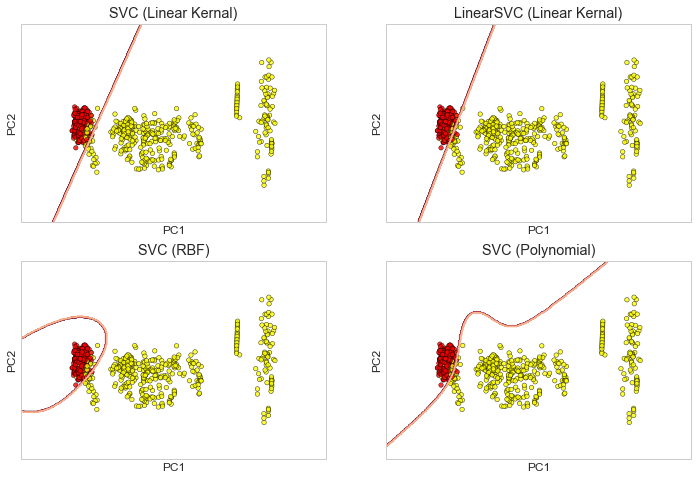

In [111]:
from sklearn.model_selection import cross_val_score
training_score = cross_val_score(classifier,X_train,Y_train, cv=5)   # calculate the crossvalidation score
print("The prediction accuracy of the SVM model after cross validation is {:.2f}%".format(100*training_score.mean()))




Xpca = PCA(n_components=2).fit_transform(RUSdata[features].values)  # instanciate the pca 
Ypca = RUSdata["Class"]
visualdata = pd.DataFrame(Xpca.copy())
visualdata["Class"] = Ypca.values 
visualdata.columns = ["PC1","PC2","Class"]
visualdata= shuffle(visualdata)
visualdata.head()


def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    return xx, yy
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contour(xx, yy, Z, **params)
    return out
X = visualdata.drop("Class",axis=1).values
y = visualdata["Class"].values
C = 1.5
models = (svm.SVC(kernel='linear', C=C),svm.LinearSVC(C=C),svm.SVC(kernel='rbf', gamma=0.7, C=C),svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)
titles = ('SVC (Linear Kernal)','LinearSVC (Linear Kernal)','SVC (RBF)','SVC (Polynomial)')
fig, sub = plt.subplots(2, 2,figsize=(12,8))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,alpha=1)
    ax.scatter(X0, X1, c=y, cmap = "autumn", s=20, edgecolors='k',alpha = 0.8)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_xticks(()) 
    ax.set_yticks(()) 
    ax.set_title(title)
    
    
    


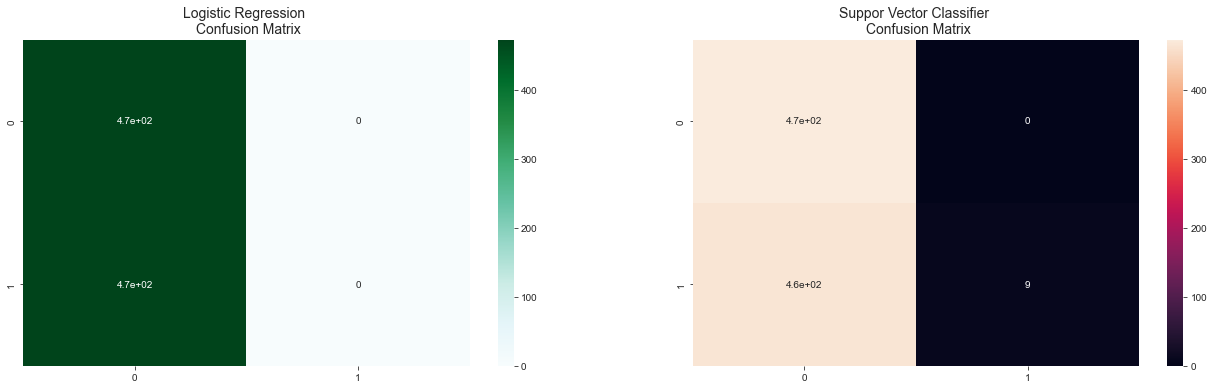

In [75]:
from sklearn.metrics import confusion_matrix
lr = LogisticRegression()         # instanciate a logistic regression model named lr
lr.fit(X_train,Y_train)  
y_pred_log = lr.predict(X_test)
y_pred_svc = classifier.predict(X_test)
log_reg_cf = confusion_matrix(Y_test, y_pred_log)
svc_cf = confusion_matrix(Y_test, y_pred_svc)       # instantiate the confusion matrix 

fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(22,6))
sns.heatmap(log_reg_cf, ax=ax1, annot=True, cmap = "BuGn")            # visualize the confusion matrix vai the heap map 
ax1.set_title("Logistic Regression \n Confusion Matrix", fontsize=14)

sns.heatmap(svc_cf, ax=ax2, annot=True)                # visualize the confusion matrix vai the heap map 
ax2.set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)

plt.show()


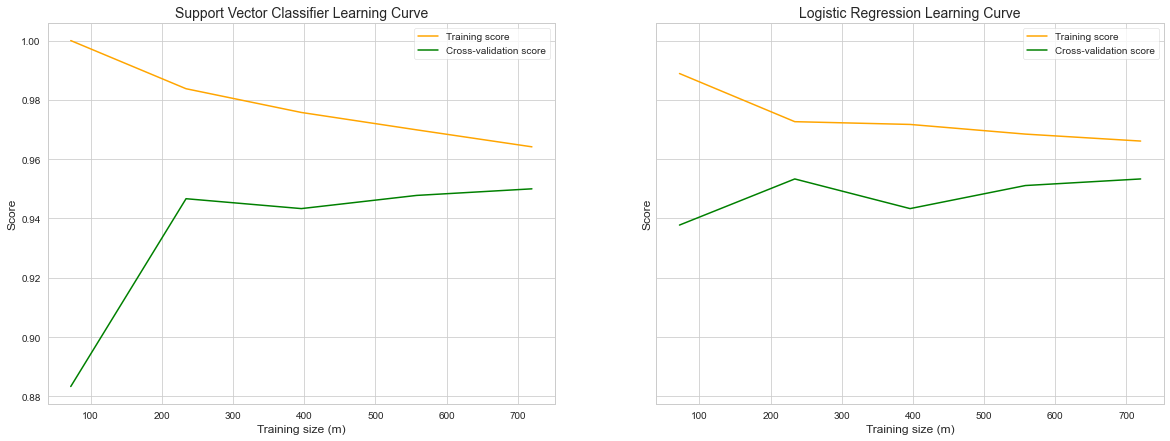

In [116]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1,estimator2, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    f,  (ax3, ax1) = plt.subplots(1,2, figsize=(20,7), sharey=True)
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    #ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1)
    #ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1)
    ax3.plot(train_sizes, train_scores_mean,label="Training score",color="orange")
    ax3.plot(train_sizes, test_scores_mean,label="Cross-validation score",color="green")
    ax3.set_title("Support Vector Classifier Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    #ax3.grid(True)
    ax3.legend(loc="best")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    #ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1)
    #ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1)
    ax1.plot(train_sizes, train_scores_mean, label="Training score",color="orange")
    ax1.plot(train_sizes, test_scores_mean,label="Cross-validation score",color="green")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    #ax1.grid(True)
    ax1.legend(loc="best") 
    
    
plot_learning_curve(classifier, lr, X_train, Y_train, (0.87, 1.01), n_jobs=4)